Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [9]:
# loading the csv data to a pandas dataframe
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df=pd.read_csv('/Gold Mine.csv')

In [16]:
# print first five rows in the dataframe
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


In [17]:
# print the last five rows of the dataframe
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2542,11/06/2012,1715.0,163585.0,1685.4,1720.9,1683.5
2543,11/05/2012,1683.2,109647.0,1676.7,1686.2,1672.5
2544,11/02/2012,1675.2,205777.0,1715.6,1717.2,1674.8
2545,11/01/2012,1715.5,105904.0,1720.4,1727.5,1715.1
2546,10/31/2012,1719.1,110928.0,1710.3,1726.6,1709.8


In [18]:
# number of rows and columns
df.shape

(2547, 6)

In [19]:
# getting some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2547 non-null   object 
 1   Close/Last  2547 non-null   float64
 2   Volume      2508 non-null   float64
 3   Open        2547 non-null   float64
 4   High        2547 non-null   float64
 5   Low         2547 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.5+ KB


In [20]:
# checking number of missing values
df.isnull().sum()

,0
Date,0
Close/Last,0
Volume,39
Open,0
High,0
Low,0


In [21]:
# statistical measures of data
df.describe()

,Close/Last,Volume,Open,High,Low
count,2547.000000,2508.000000,2547.000000,2547.000000,2547.000000
mean,1437.557008,182067.668660,1437.743031,1447.083235,1427.891991
std,255.898467,97589.342619,256.239938,257.924158,253.641116
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1243.450000,120901.000000,1243.000000,1251.000000,1235.250000
50%,1318.500000,168425.500000,1319.000000,1326.300000,1310.900000
75%,1698.100000,231754.000000,1701.450000,1715.300000,1684.000000
max,2069.400000,787217.000000,2076.400000,2082.100000,2049.000000


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.corr

In [ ]:
# constructing a heatmap tp understand the correlation
#plt.figure(figsize = (8,8))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [ ]:
# correlation values of GLD
#print(correlation['GLD'])

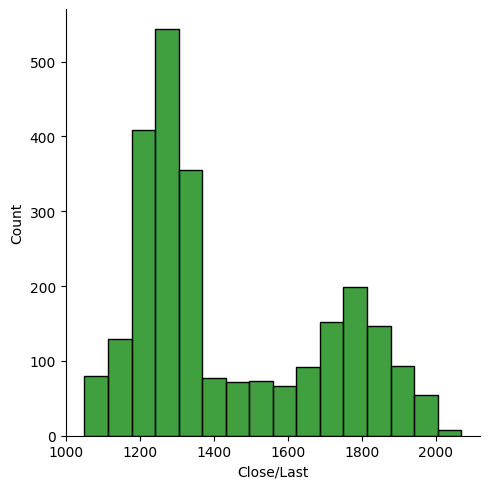

In [23]:
# checking the distribution of the GLD price
sns.displot(df['Close/Last'], color='green')

Splitting the features and target

In [24]:
X = df.drop(['Date', 'Close/Last'], axis=1)
Y = df['Close/Last']

In [25]:
print(X)

        Volume    Open    High     Low
0     186519.0  1667.2  1670.9  1640.7
1     180599.0  1668.8  1674.8  1658.5
2     183453.0  1657.7  1679.4  1653.8
3     178706.0  1654.5  1666.8  1641.2
4     167448.0  1662.9  1675.5  1648.0
...        ...     ...     ...     ...
2542  163585.0  1685.4  1720.9  1683.5
2543  109647.0  1676.7  1686.2  1672.5
2544  205777.0  1715.6  1717.2  1674.8
2545  105904.0  1720.4  1727.5  1715.1
2546  110928.0  1710.3  1726.6  1709.8

[2547 rows x 4 columns]


In [26]:
print(Y)

0       1648.3
1       1668.8
2       1669.2
3       1658.0
4       1654.1
         ...  
2542    1715.0
2543    1683.2
2544    1675.2
2545    1715.5
2546    1719.1
Name: Close/Last, Length: 2547, dtype: float64


Splitting into Training and Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [30]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[1074.651 1232.004 1211.322 1445.464 1312.643 1251.364 1506.368 1250.911
 1874.971 1869.093 1249.754 1166.182 1321.337 1847.4   1250.515 1114.179
 1693.094 1952.285 1728.808 1147.655 1251.888 1660.517 1331.08  1314.606
 1397.784 1317.953 1860.449 1240.024 1224.425 1370.527 1802.601 1282.62
 1840.525 1615.75  1275.328 1205.638 1585.316 1203.461 1909.719 1867.128
 1804.839 1741.905 1664.748 1383.912 1370.855 1778.679 1142.172 1343.911
 1909.104 1788.248 1146.287 1330.384 1266.052 1323.94  1216.975 1228.315
 1787.204 1325.352 1806.685 1726.311 1370.365 1275.037 1297.339 1259.302
 1507.655 1142.256 1947.913 1202.692 1917.668 1865.425 1334.478 1198.653
 1179.191 1178.797 1930.23  1976.64  1197.684 1211.952 1339.402 1135.274
 1179.229 1701.889 1801.515 1349.097 1126.709 1307.413 1498.36  1236.418
 1806.058 1225.212 1877.255 1717.938 1347.942 1553.152 1185.453 1347.403
 1808.262 1823.523 1334.337 1789.085 1754.225 1296.253 1315.295 1250.684
 1287.806 1686.074 1752.702 1384.016 1180.5   1957.7

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9992787886611191


Compare the actual values and predicted values in a plot

In [34]:
Y_test = list(Y_test)

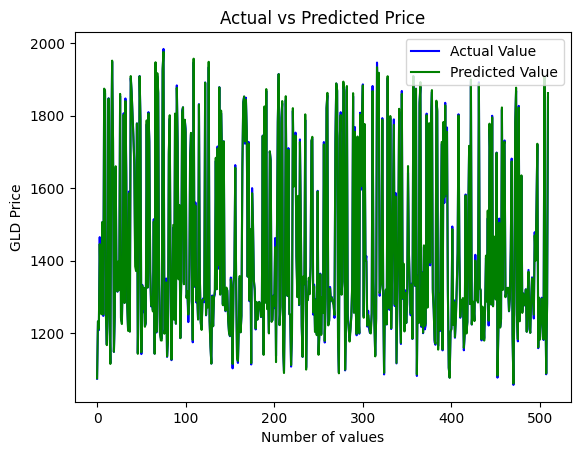

In [35]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()